In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [37]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 전처리 **과정**

In [38]:
file_path = "kream_data.csv"
df = pd.read_csv(file_path)

In [40]:
df

,상품명,상품URL,브랜드,거래량,최근거래가,모델번호,발매일,발매일로부터현재까지일,발매가,색상,색상개수,최고거래가,최고거래성사일,최저거래가,최저거래성사일,관심,스타일
0,나이키 V2K 런 서밋 화이트 메탈릭 실버,https://kream.co.kr/products/137241,Nike,53000,115000,FD0736-100,2023/06/15,340.0,139000.0,Summit White/Metallic Silver,2,399000,2023/06/15,82000,2024/01/14,7,1
1,아디다스 삼바 OG 클라우드 화이트,https://kream.co.kr/products/15251,Adidas,90000,142000,B75806,2018/01/01,2331.0,139000.0,Cloud White/Core Black/Clear Granite,3,350000,2023/02/01,70000,2024/02/06,120000,1
2,나이키 에어포스 1 '07 로우 화이트,https://kream.co.kr/products/12831,Nike,474000,148000,315122-111/CW2288-111,-,NaN,139000.0,White/White,2,299000,2022/02/15,80000,2022/11/19,21,9
3,나이키 V2K 런 퓨어 플래티넘 울프 그레이,https://kream.co.kr/products/229945,Nike,14000,123000,FD0736-003,2024/01/18,123.0,139000.0,Pure Platinum/Wolf Grey/Cool Grey/Metallic Coo...,4,249000,2024/04/14,98000,2024/04/18,2,172
4,뉴발란스 530 스틸 그레이,https://kream.co.kr/products/28260,New Balance,130000,142000,MR530KA,2021/01/08,1228.0,129000.0,Steel Grey,1,319000,2022/12/06,70000,2021/07/30,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9314,반스 에라 95 DX 애너하임 팩토리 옐로우,https://kream.co.kr/products/44084,Vans,13,61000,VN0A2RR11VF,-,NaN,103700.0,Og Yellow/Og Tan,2,61000,2023/04/07,30000,2022/03/18,77,1
9315,반스 어센틱 체커보드 워터폴,https://kream.co.kr/products/44083,Vans,44,59000,VN0A348A3YF,-,NaN,59000.0,Waterfall/True White,2,59000,2024/02/25,30000,2023/06/03,93,3
9316,아디다스 x 비욘세 아이비 파크 나이트 조거 오프 화이트,https://kream.co.kr/products/44013,Adidas,31,169000,S29038,2020/10/30,1300.0,217700.0,Off White/Ecru Tint/Dark Green,3,200000,2022/01/30,60000,2023/09/18,75,4
9317,나이키 에어맥스 AP 트리플 블랙,https://kream.co.kr/products/43981,Nike,175,80000,CU4826-001,-,NaN,119000.0,Black/Black-Black-Volt,2,139000,2024/03/06,70000,2023/08/29,498,3


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9319 entries, 0 to 9318
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   상품명          9319 non-null   object 
 1   상품URL        9319 non-null   object 
 2   브랜드          9319 non-null   object 
 3   거래량          9319 non-null   int64  
 4   최근거래가        9319 non-null   int64  
 5   모델번호         9319 non-null   object 
 6   발매일          9319 non-null   object 
 7   발매일로부터현재까지일  6259 non-null   float64
 8   발매가          8644 non-null   float64
 9   색상           9319 non-null   object 
 10  색상개수         9319 non-null   int64  
 11  최고거래가        9319 non-null   int64  
 12  최고거래성사일      9319 non-null   object 
 13  최저거래가        9319 non-null   int64  
 14  최저거래성사일      9319 non-null   object 
 15  관심           9319 non-null   int64  
 16  스타일          9319 non-null   int64  
dtypes: float64(2), int64(7), object(8)
memory usage: 1.2+ MB


In [42]:
df.describe()

,거래량,최근거래가,발매일로부터현재까지일,발매가,색상개수,최고거래가,최저거래가,관심,스타일
count,9319.000000,9.319000e+03,6259.000000,8.644000e+03,9319.000000,9.319000e+03,9.319000e+03,9319.000000,9319.000000
mean,1221.975856,2.432079e+05,764.297492,2.106997e+05,2.461208,3.865884e+05,1.545080e+05,1310.302822,43.998927
std,8507.178063,3.531319e+05,558.465037,2.108462e+05,0.909498,6.180399e+05,2.348732e+05,3211.605900,106.894118
min,10.000000,2.000000e+04,3.000000,8.300000e+03,1.000000,2.900000e+04,2.000000e+04,0.000000,0.000000
25%,30.000000,1.080000e+05,396.000000,1.290000e+05,2.000000,1.800000e+05,7.000000e+04,161.000000,2.000000
50%,95.000000,1.590000e+05,654.000000,1.633000e+05,2.000000,2.590000e+05,1.000000e+05,440.000000,7.000000
75%,445.500000,2.500000e+05,941.500000,2.280000e+05,3.000000,4.000000e+05,1.540000e+05,1383.500000,32.000000
max,474000.000000,1.300000e+07,4890.000000,4.390000e+06,6.000000,2.000000e+07,6.990000e+06,120000.000000,998.000000


중복값 확인

In [43]:
duplicate_rows = df.duplicated(keep=False)
num_duplicates = duplicate_rows.sum()

if num_duplicates > 0:
    print(f"There are {num_duplicates} duplicate rows in the data.")
else:
    print("There are no duplicate rows in the data.")

There are no duplicate rows in the data.


In [44]:
df = df.drop(columns=['상품URL', '모델번호','색상'])

In [45]:
invalid_rows = df[df['발매일로부터현재까지일'].isnull() | df['발매가'].isnull()].index

# 유효한 '발매일로부터현재까지일' 또는 '발매가' 값이 없는 행 삭제
df_cleaned = df.drop(invalid_rows)

# 결과 확인
print(f'Number of rows after removing invalid "발매일로부터현재까지일" and "발매가" rows: {df_cleaned.shape[0]}')

Number of rows after removing invalid "발매일로부터현재까지일" and "발매가" rows: 6166


In [46]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6166 entries, 0 to 9318
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   상품명          6166 non-null   object 
 1   브랜드          6166 non-null   object 
 2   거래량          6166 non-null   int64  
 3   최근거래가        6166 non-null   int64  
 4   발매일          6166 non-null   object 
 5   발매일로부터현재까지일  6166 non-null   float64
 6   발매가          6166 non-null   float64
 7   색상개수         6166 non-null   int64  
 8   최고거래가        6166 non-null   int64  
 9   최고거래성사일      6166 non-null   object 
 10  최저거래가        6166 non-null   int64  
 11  최저거래성사일      6166 non-null   object 
 12  관심           6166 non-null   int64  
 13  스타일          6166 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 722.6+ KB


파생변수 추가

In [47]:
# '가격변동성' 컬럼 추가
df_cleaned['가격변동성'] = (100*(df_cleaned['최고거래가'] - df_cleaned['최저거래가']) / df_cleaned['최고거래가']).round(2)

# '수익률' 컬럼 추가
df_cleaned['수익률'] = (100*(df_cleaned['최고거래가'] - df_cleaned['발매가']) / df_cleaned['발매가']).round(2)

In [48]:
#'콜라보' 컬럼 추가
df_cleaned['콜라보'] = df_cleaned['상품명'].apply(lambda x: 1 if 'x' in x else 0)

브랜드 상위 10개만 남김

In [49]:
brand_counts = df_cleaned['브랜드'].value_counts()

# 결과 확인
print('브랜드별 개수:')
print(brand_counts)

브랜드별 개수:
브랜드
Nike                 2538
Jordan                978
New Balance           801
Adidas                715
Asics                 336
Vans                  166
Converse              159
Salomon                99
Mihara Yasuhiro        95
Puma                   90
Reebok                 50
Hoka                   38
Oakley                 19
Y-3                    11
Ader Error             11
Clarks                  8
Louis Vuitton           6
Fila                    6
Balenciaga              5
BAPE                    4
On Running              4
Keen                    3
Norda                   3
Under Armour            3
Onitsuka Tiger          3
Mizuno                  3
Camper                  3
LOW CLASSIC             2
Dior                    2
Zara                    2
Roa Hiking              1
Gucci                   1
Alexander McQueen       1
Name: count, dtype: int64


In [50]:
brands_to_keep = ['Nike', 'Jordan', 'New Balance', 'Adidas', 'Asics', 'Vans', 'Converse', 'Salomon', 'Mihara Yasuhiro', 'Puma']

# 주어진 브랜드에 속하는 행만 필터링
df_filtered = df_cleaned[df_cleaned['브랜드'].isin(brands_to_keep)]

In [51]:
# df_filtered에서 고유한 브랜드의 개수 확인
brand_count = df_filtered['브랜드'].nunique()
print(f"Number of unique brands in df_filtered: {brand_count}")

Number of unique brands in df_filtered: 10


브랜드 (범주형 변수) 원핫인코딩 진행

In [52]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
brand_encoded = one_hot_encoder.fit_transform(df_filtered[['브랜드']]).toarray()
brand_encoded_df = pd.DataFrame(brand_encoded, columns=one_hot_encoder.get_feature_names_out(['브랜드']))

In [53]:
brand_encoded_df

,브랜드_Adidas,브랜드_Asics,브랜드_Converse,브랜드_Jordan,브랜드_Mihara Yasuhiro,브랜드_New Balance,브랜드_Nike,브랜드_Puma,브랜드_Salomon,브랜드_Vans
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5972,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5973,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5974,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5975,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# df_cleaned와 brand_encoded_df를 열 방향으로 병합 (인덱스 무시)
df_filtered = pd.concat([df_filtered.reset_index(drop=True), brand_encoded_df], axis=1)
df_filtered = df_filtered.drop(columns=['브랜드'])
df_filtered

,상품명,거래량,최근거래가,발매일,발매일로부터현재까지일,발매가,색상개수,최고거래가,최고거래성사일,최저거래가,...,브랜드_Adidas,브랜드_Asics,브랜드_Converse,브랜드_Jordan,브랜드_Mihara Yasuhiro,브랜드_New Balance,브랜드_Nike,브랜드_Puma,브랜드_Salomon,브랜드_Vans
0,나이키 V2K 런 서밋 화이트 메탈릭 실버,53000,115000,2023/06/15,340.0,139000.0,2,399000,2023/06/15,82000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,아디다스 삼바 OG 클라우드 화이트,90000,142000,2018/01/01,2331.0,139000.0,3,350000,2023/02/01,70000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,나이키 V2K 런 퓨어 플래티넘 울프 그레이,14000,123000,2024/01/18,123.0,139000.0,4,249000,2024/04/14,98000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,뉴발란스 530 스틸 그레이,130000,142000,2021/01/08,1228.0,129000.0,1,319000,2022/12/06,70000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,나이키 에어포스 1 '07 WB 플랙스,180000,154000,2019/09/10,1714.0,169000.0,5,450000,2022/09/07,73000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5972,조던 자이언 1 PF 카본 그린,58,58000,2021/10/13,952.0,139000.0,2,139000,2023/10/23,47000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5973,(W) 나이키 에어 베이퍼맥스 2020 플라이니트 다크 레이즌,17,139000,2021/02/05,1202.0,259000.0,4,159000,2022/10/18,70000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5974,(W) 나이키 에어포스 1 하이 스컬프트 실버,171,165000,2021/11/07,927.0,159000.0,2,229000,2022/04/19,70000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5975,아디다스 x 비욘세 아이비 파크 나이트 조거 오프 화이트,31,169000,2020/10/30,1300.0,217700.0,3,200000,2022/01/30,60000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


상관관계 히트맵 시각화

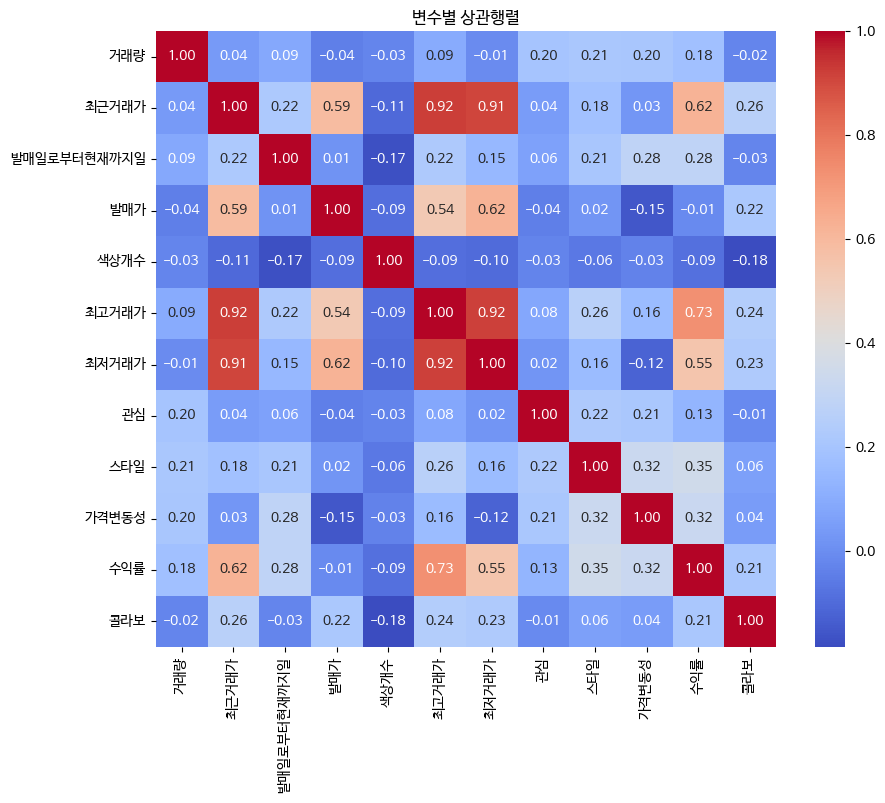

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False
df_filtered_without_product_name = df_filtered.drop(columns=['상품명','발매일','최고거래성사일','최저거래성사일','브랜드_Adidas','브랜드_Asics','브랜드_Converse','브랜드_Jordan','브랜드_Mihara Yasuhiro','브랜드_New Balance','브랜드_Nike','브랜드_Puma','브랜드_Salomon','브랜드_Vans'])

# 상관 행렬 계산
correlation_matrix = df_filtered_without_product_name.corr()

# 상관 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('변수별 상관행렬')
plt.show()


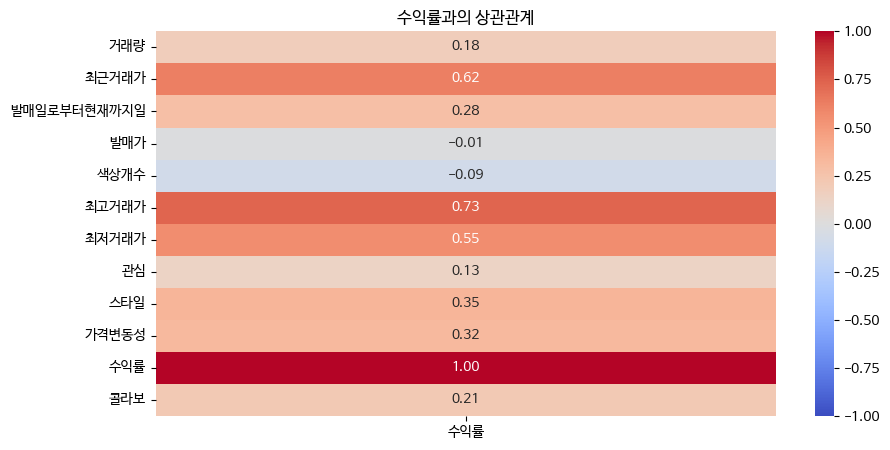

In [56]:
# 수익률과 다른 변수들 간의 상관 행렬 추출
correlation_with_profit = correlation_matrix[['수익률']]
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_with_profit, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('수익률과의 상관관계')
plt.show()

분포 양상 확인
히스토그램 통한 시각화

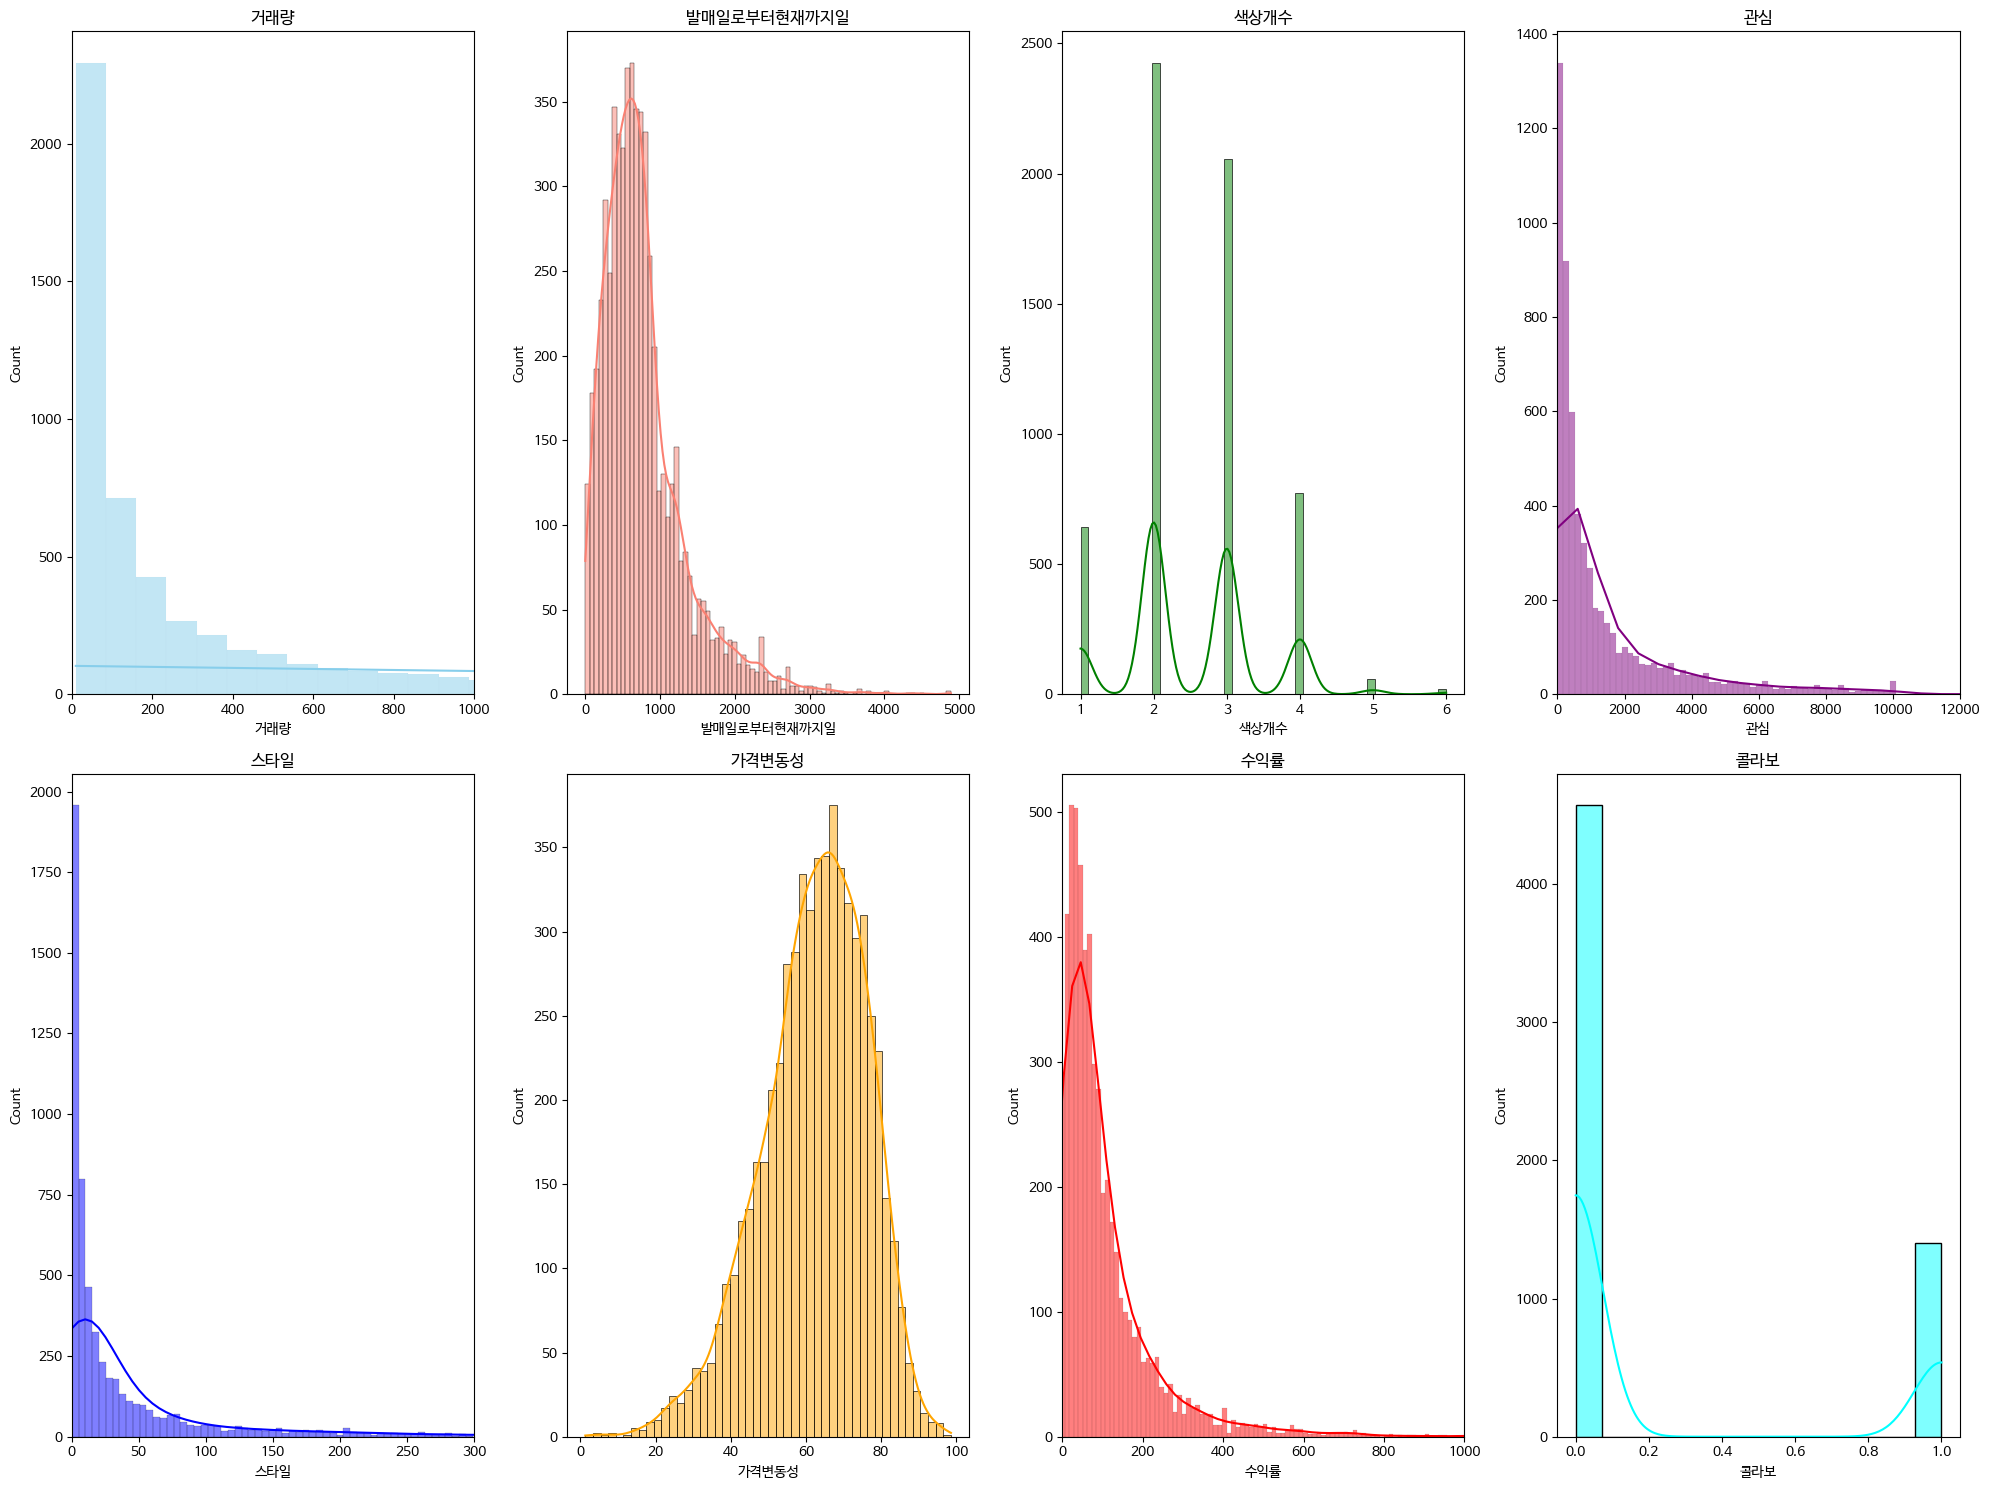

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램 시각화
plt.figure(figsize=(20, 15))

plt.subplot(2, 4, 1)
sns.histplot(df_filtered['거래량'], kde=True, color='skyblue')
plt.title('거래량')
plt.xlim(0,1000)

plt.subplot(2, 4, 2)
sns.histplot(df_filtered['발매일로부터현재까지일'], kde=True, color='salmon')
plt.title('발매일로부터현재까지일')

plt.subplot(2, 4, 3)
sns.histplot(df_filtered['색상개수'], kde=True, color='green')
plt.title('색상개수')

plt.subplot(2, 4, 4)
sns.histplot(df_filtered['관심'], kde=True, color='purple')
plt.title('관심')
plt.xlim(0,12000)

plt.subplot(2, 4, 5)
sns.histplot(df_filtered['스타일'], kde=True, color='blue')
plt.title('스타일')
plt.xlim(0,300)

plt.subplot(2, 4, 6)
sns.histplot(df_filtered['가격변동성'], kde=True, color='orange')
plt.title('가격변동성')

plt.subplot(2, 4, 7)
sns.histplot(df_filtered['수익률'], kde=True, color='red')
plt.title('수익률')
plt.xlim(0,1000)

plt.subplot(2, 4, 8)
sns.histplot(df_filtered['콜라보'], kde=True, color='cyan')
plt.title('콜라보')

plt.tight_layout()
plt.show()


skewed한 분포 확인

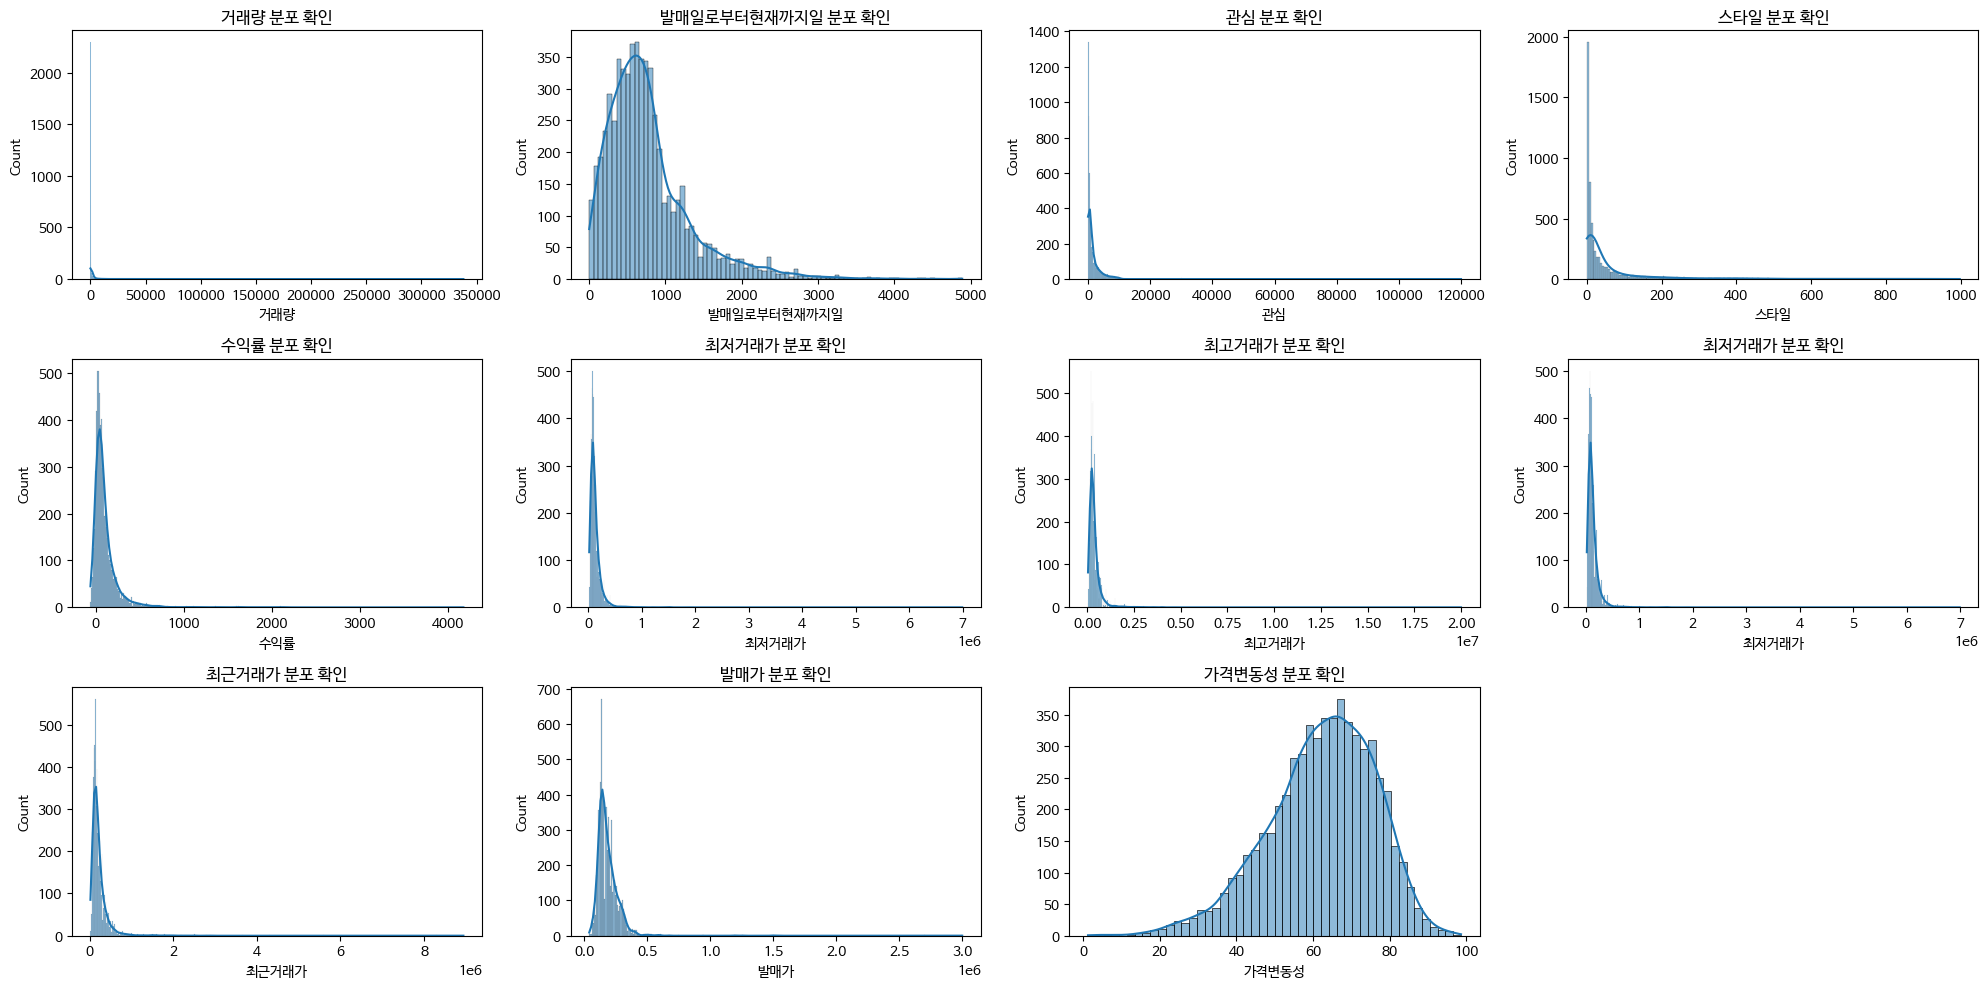

In [59]:
# 히스토그램 시각화 및 분포 확인
plt.figure(figsize=(20, 10))

columns_to_check = ['거래량','발매일로부터현재까지일','관심','스타일','수익률','최저거래가','최고거래가', '최저거래가', '최근거래가', '발매가','가격변동성']
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_filtered[column], kde=True)
    plt.title(f'{column} 분포 확인')

plt.tight_layout()
plt.show()


야콥슨 변환 수행

In [60]:
from scipy.stats import yeojohnson

columns_to_transform = ['거래량', '발매일로부터현재까지일', '관심', '스타일', '수익률', '최저거래가', '최고거래가', '최근거래가', '발매가', '가격변동성']

# Yeo-Johnson 변환 함수 정의
def yeojohnson_transform(column):
    transformed_values, lambda_value = yeojohnson(column)
    return transformed_values, lambda_value

# Yeo-Johnson 변환 적용
for column in columns_to_transform:
    df_filtered[column], _ = yeojohnson_transform(df_filtered[column])


변환 후 수정된 분포 확인

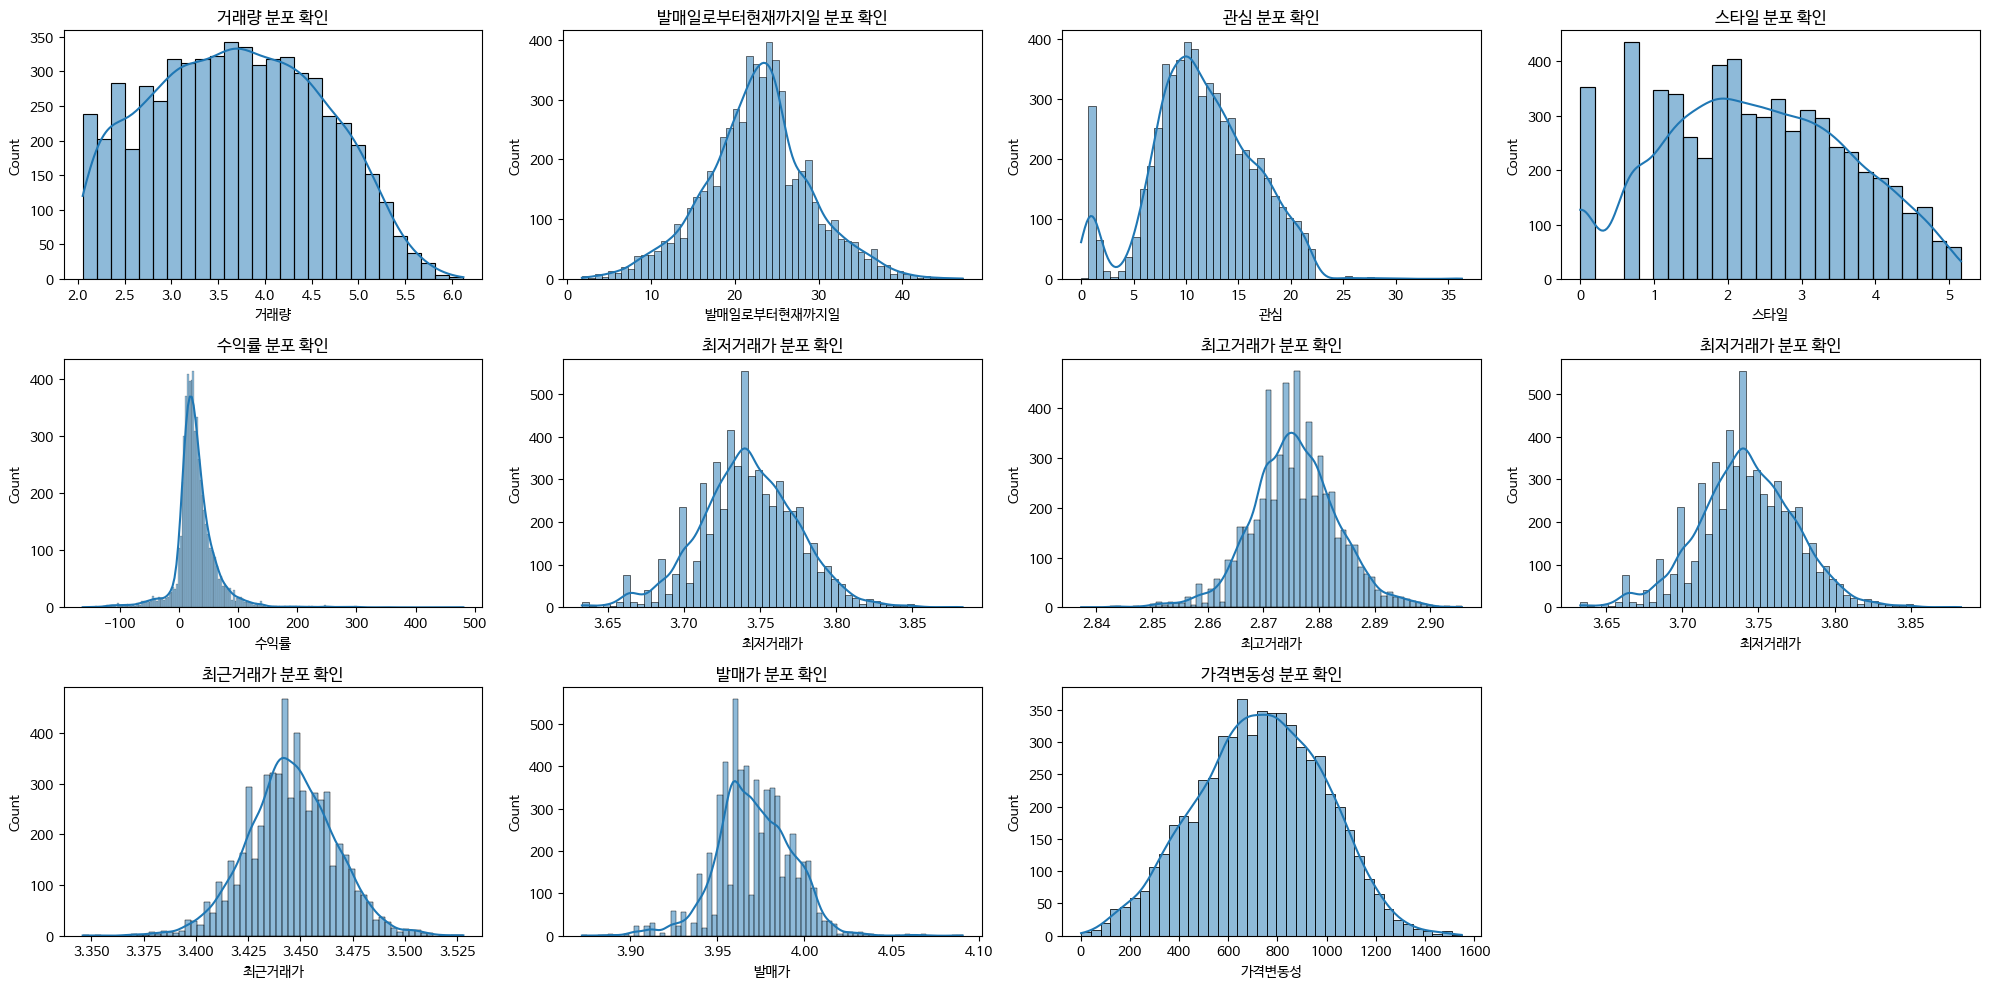

In [61]:
plt.figure(figsize=(20, 10))

columns_to_check = ['거래량','발매일로부터현재까지일','관심','스타일','수익률','최저거래가','최고거래가', '최저거래가', '최근거래가', '발매가','가격변동성']
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_filtered[column], kde=True)
    plt.title(f'{column} 분포 확인')

plt.tight_layout()
plt.show()

z-score 사용한 이상치 제거 진행

In [62]:
import numpy as np
from scipy.stats import zscore

# Z-score를 이용한 이상치 제거 함수 정의
def remove_outliers(df, threshold=1.96):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    z_scores = df[numeric_cols].apply(zscore)  # 각 컬럼별로 Z-score 계산
    abs_z_scores = np.abs(z_scores)  # Z-score의 절대값 구하기
    filtered_entries = (abs_z_scores < threshold).all(axis=1)  # 각 컬럼별로 threshold 미만인 데이터 유지
    return df[filtered_entries]

# 이상치 제거
df_filtered = remove_outliers(df_filtered)

# 결과 확인
print(df_filtered.describe())


               거래량        최근거래가  발매일로부터현재까지일          발매가         색상개수  \
count  1721.000000  1721.000000  1721.000000  1721.000000  1721.000000   
mean      3.607907     3.442834    23.144581     3.970530     2.783266   
std       0.788471     0.016505     5.189525     0.015212     0.860016   
min       2.052011     3.404743    10.368634     3.930693     1.000000   
25%       2.984493     3.430625    19.947447     3.959586     2.000000   
50%       3.646747     3.441756    23.381713     3.968810     3.000000   
75%       4.244644     3.453888    26.143638     3.981670     4.000000   
max       5.263811     3.486080    35.164487     4.012545     4.000000   

             최고거래가        최저거래가           관심          스타일        가격변동성  ...  \
count  1721.000000  1721.000000  1721.000000  1721.000000  1721.000000  ...   
mean      2.874543     3.737356    12.025005     2.211918   740.796815  ...   
std       0.005636     0.023871     3.883356     1.163286   218.851728  ...   
min       2.86061

다중공선성 확인 (모두 10 미만의 작은 값이어서 이상 없다고 판단)

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 모든 숫자형 컬럼 선택
numeric_columns = df_filtered.select_dtypes(include=[np.number]).columns

# VIF 계산 함수 정의
def calculate_vif(dataframe, features):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(dataframe[features].values, i) for i in range(len(features))]
    return vif_data

# 선택한 컬럼들에 대해 VIF 계산
vif_df = calculate_vif(df_filtered, numeric_columns)

# VIF 값 출력
print(vif_df)

                Feature           VIF
0                   거래량  5.595739e+00
1                 최근거래가  3.078898e+00
2           발매일로부터현재까지일  1.371699e+00
3                   발매가  1.431211e+01
4                  색상개수  1.124130e+00
5                 최고거래가  7.657960e+01
6                 최저거래가  6.731894e+01
7                    관심  4.757371e+00
8                   스타일  3.991808e+00
9                 가격변동성  4.046592e+01
10                  수익률  2.762133e+01
11                  콜라보  1.256705e+00
12           브랜드_Adidas           NaN
13            브랜드_Asics           NaN
14         브랜드_Converse           NaN
15           브랜드_Jordan           NaN
16  브랜드_Mihara Yasuhiro           NaN
17      브랜드_New Balance           NaN
18             브랜드_Nike  9.011823e+06
19             브랜드_Puma           NaN
20          브랜드_Salomon           NaN
21             브랜드_Vans           NaN


전처리 완료한 파일 csv 파일로 저장

In [66]:
# DataFrame을 CSV 파일로 저장하는 코드
df_filtered.to_csv('df_filtered.csv', index=False)

print("df_filtered has been saved as 'df_filtered.csv'.")

df_filtered has been saved as 'df_filtered.csv'.
